# Stats Project!
---
This dataset catalogues human genetic variants (Also called Allele)
- There are many genes within the human body
- Gene copying is not perfect, so genes in different cells may differ a lot from each other
- Some of these variants are safe, some are dangerous
- Some variants are more common than others, and this dataset likely contains most of the common ones
- The SIFT, PolyPhen, etc. scores are generated by genome-analysing algorithms that can identify whether the variant is dangerous (deleterious / damaging / pathogenic) or safe (benign / tolerated)

The dataset in this repository is not the same as the [original](https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting), the columns were renamed to be more descriptive and some useless columns were removed

Hypothesis: **Does the statistical properties of a gene expression help predict whether or not it is dangerous?**

### Installs and imports

In [2]:
%pip install numpy pandas seaborn scipy statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels as sm
import math

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("./Clinvar.csv")
df.describe()

/tmp/ipykernel_274956/2775463472.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Clinvar.csv")


,Position on chromosome,Allele frequencies (GO-ESP),Allele frequencies (ExAC),Allele frequencies (1000 genomes project),Allele origin,Has conflicting submissions,STRAND,LoFtool score,CADD score (Phred-scaled),Raw CADD score,BLOSUM62 score
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65174.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.342486,0.252102,-0.006659,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.688772,0.434223,0.999985,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,0.000000,-1.000000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.000000,1.000000,1.000000,99.000000,46.556261,3.000000


In [6]:
df.head()

,Chromosome,Position on chromosome,Reference Allele,Alternate Allele,Allele frequencies (GO-ESP),Allele frequencies (ExAC),Allele frequencies (1000 genomes project),Disease database name and identifier,ClinVar's preferred disease name,HGVS expression,...,Amino acid location in protein,Amino acids,Codons,STRAND,SIFT score,PolyPhen score,LoFtool score,CADD score (Phred-scaled),Raw CADD score,BLOSUM62 score
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,...,174,E/D,gaG/gaC,1.0,tolerated,benign,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,...,170,P/L,cCg/cTg,-1.0,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,...,80,I/T,aTc/aCc,-1.0,NaN,probably_damaging,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,...,34,G/S,Ggc/Agc,1.0,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,...,34,G/C,Ggc/Tgc,1.0,NaN,NaN,NaN,24.700,4.766224,-3.0


### Plotting every numerical variable against every other

Definitely overkill

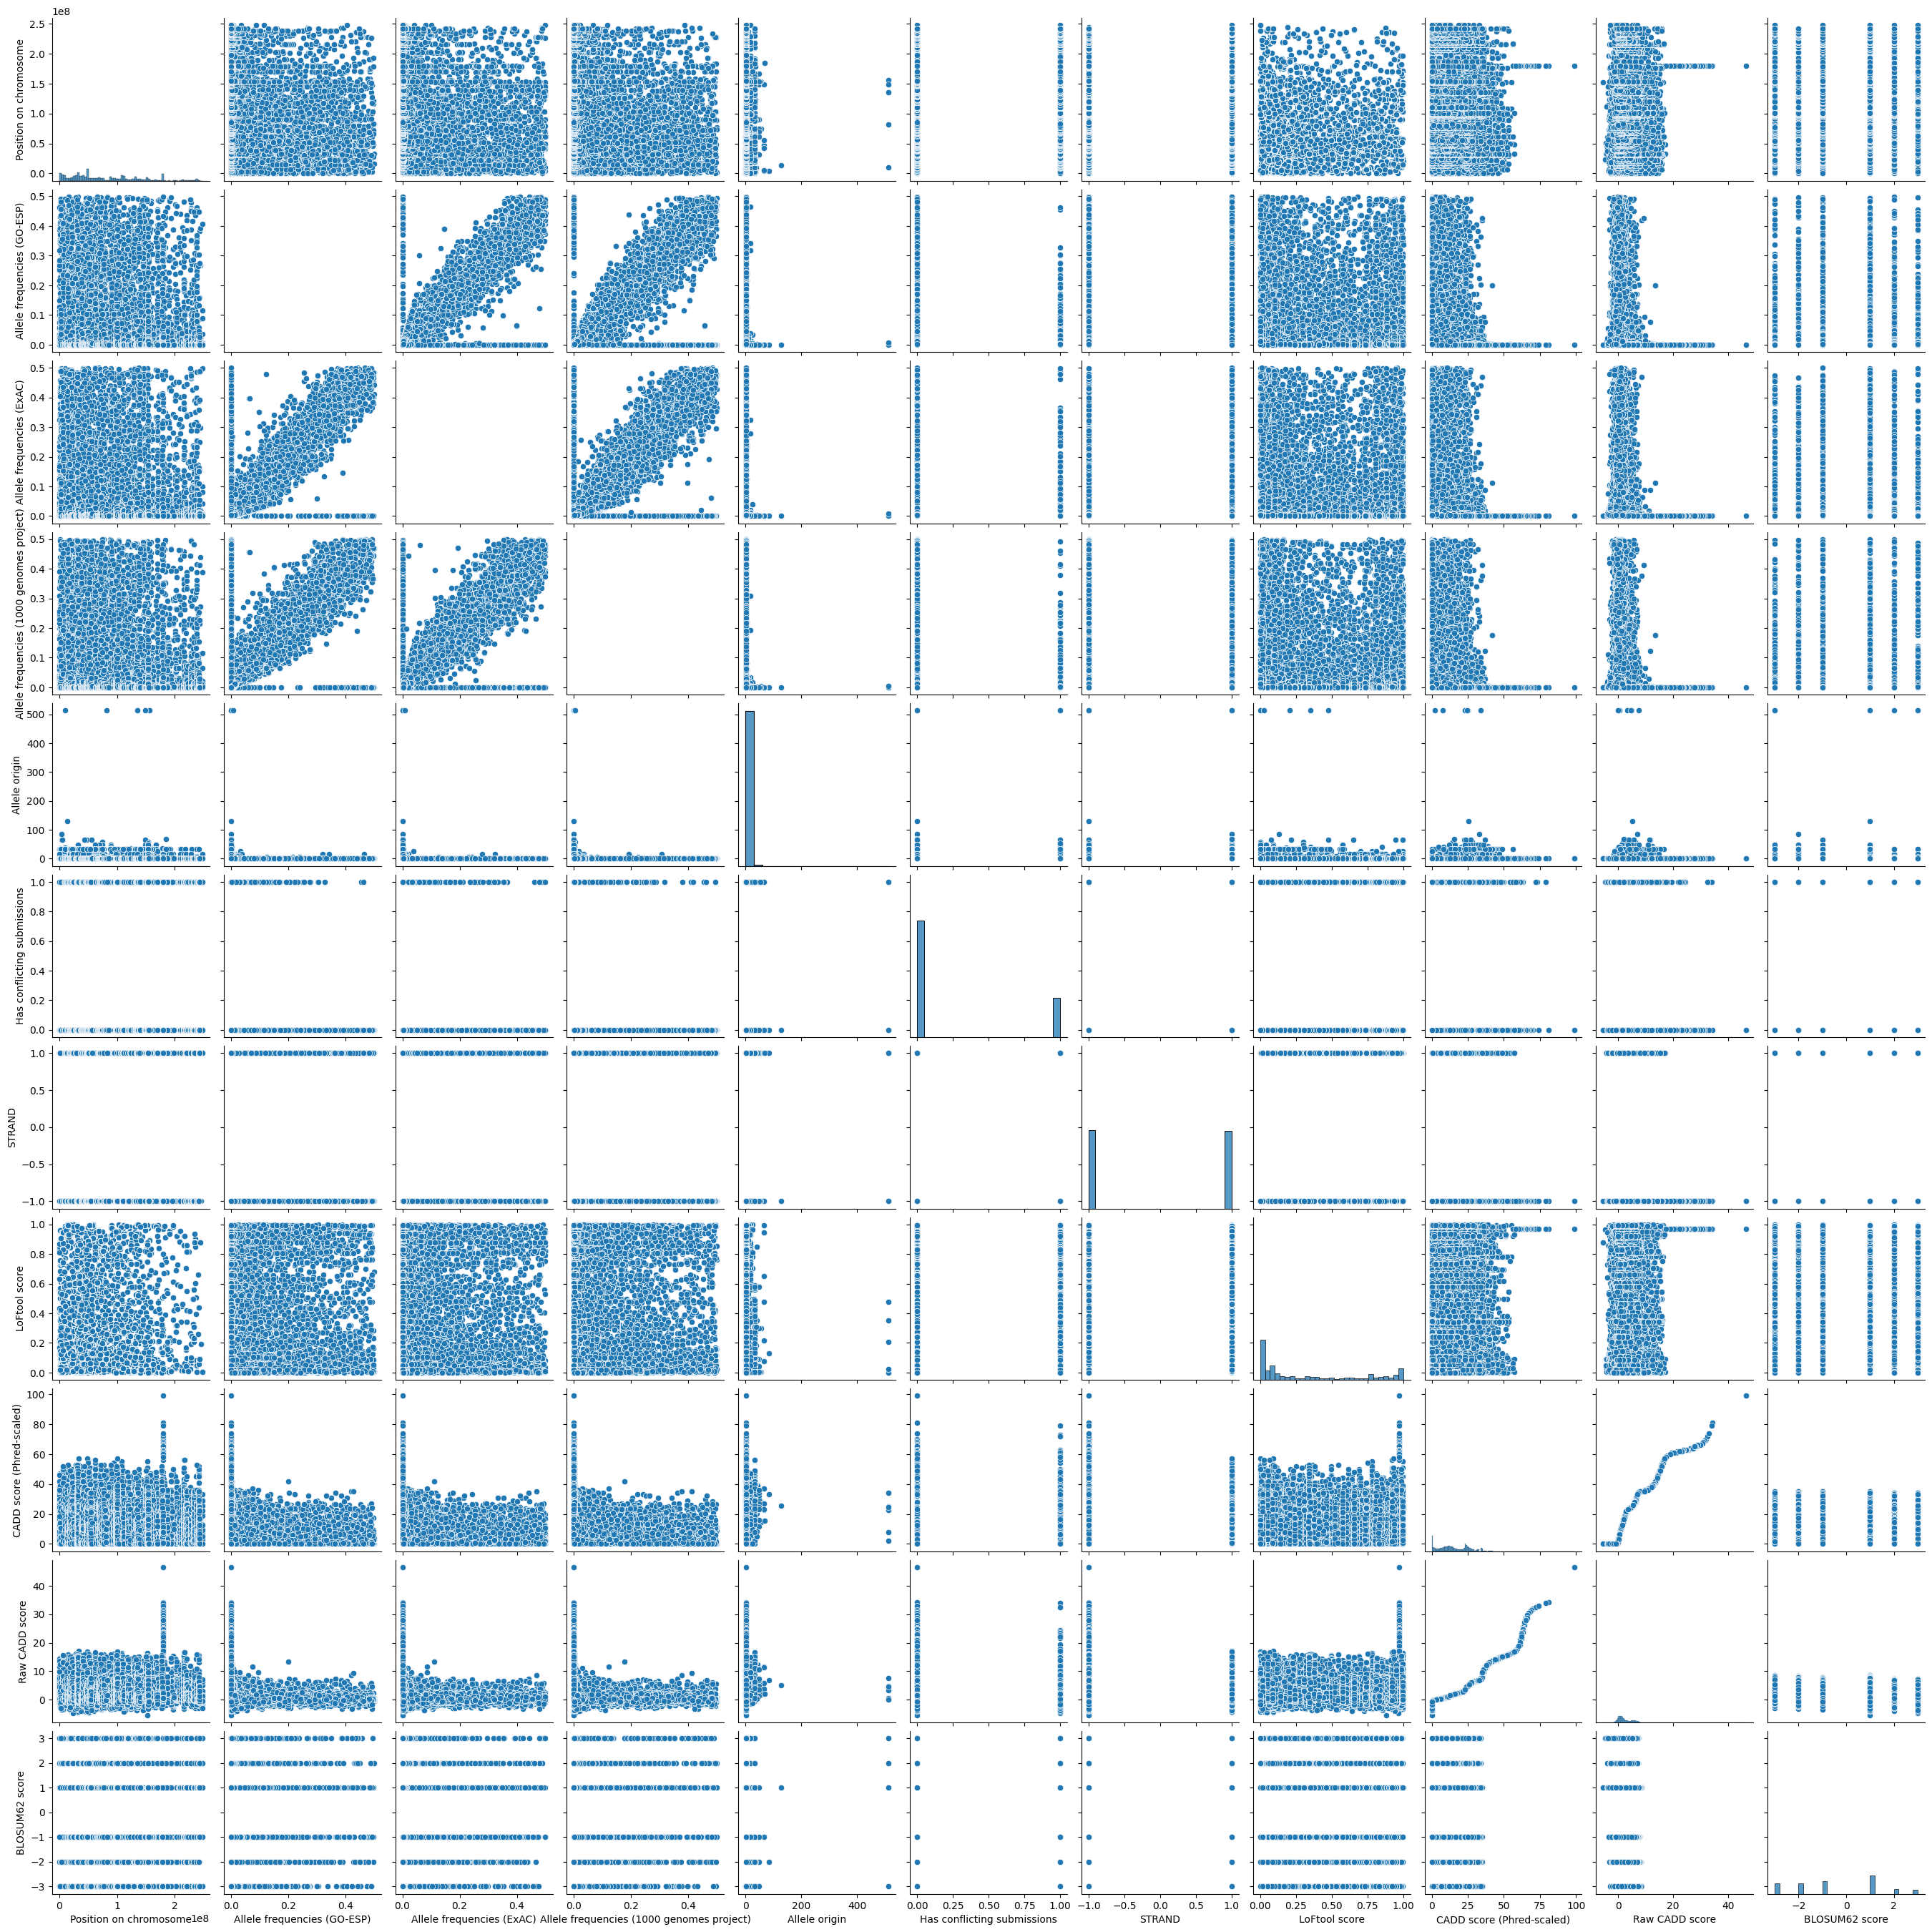

In [3]:
sns.pairplot(df)

### Get the columns we actually need

In [4]:
df = df[["Consequence", "IMPACT", "cDNA position", "CDS position", "Amino acid location in protein", "STRAND", "SIFT score", "PolyPhen score", "LoFtool score", "CADD score (Phred-scaled)", "Raw CADD score", "BLOSUM62 score"]]

### Plot it

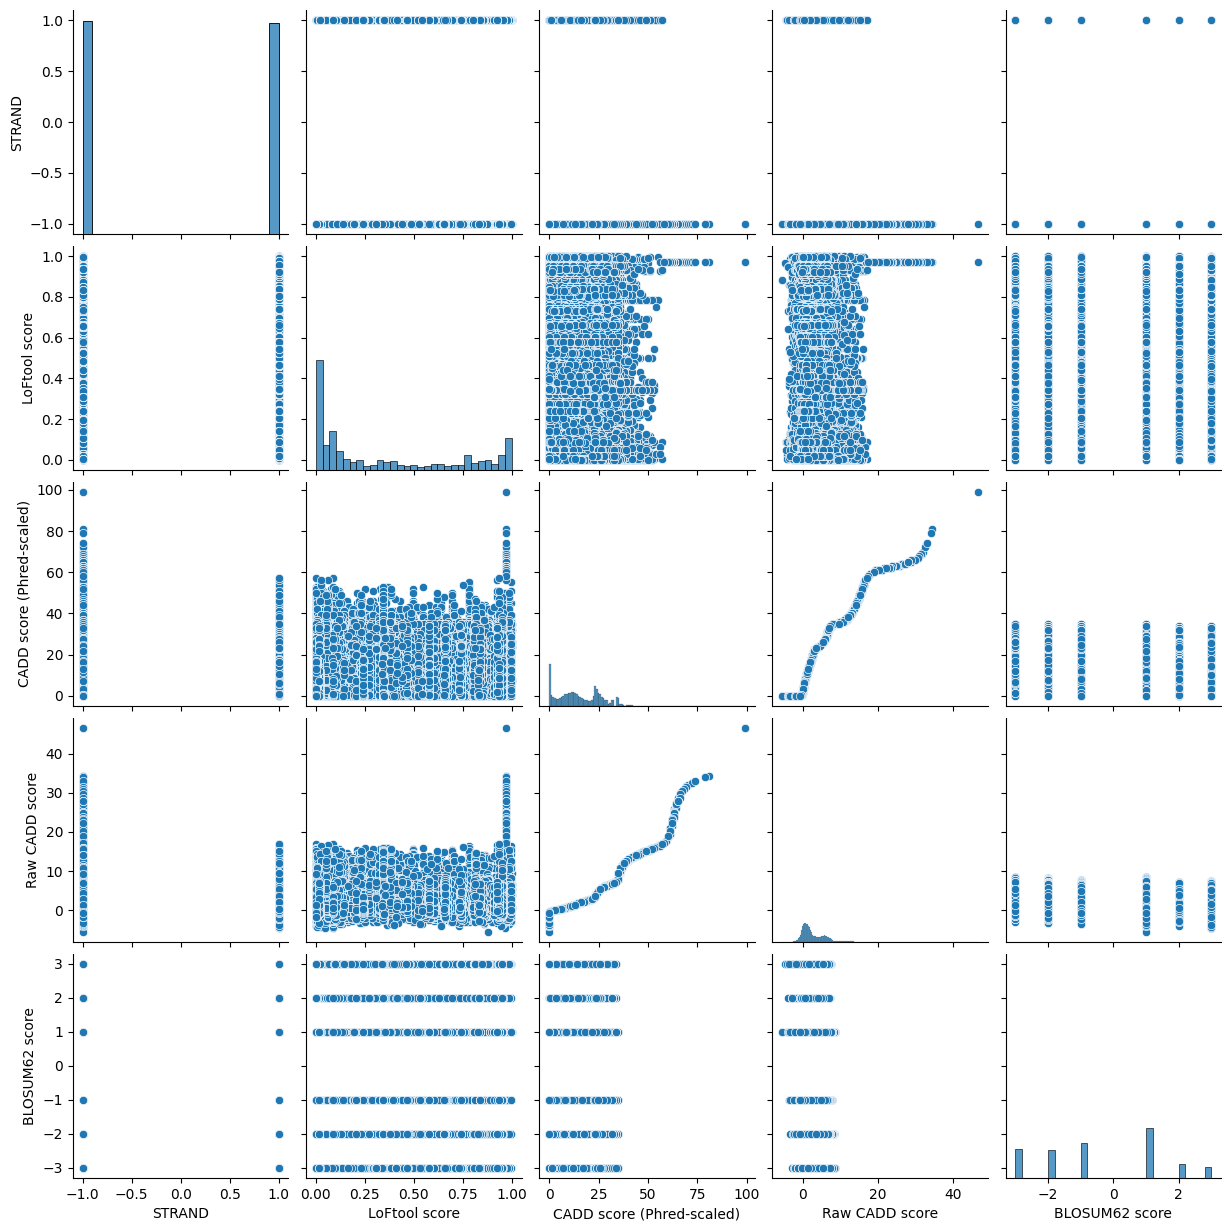

In [6]:
sns.pairplot(df)

### So here's what we're gonna do
- CADD vs STRAND (t test)
- impact vs SIFT (~~chi-square~~ z-test)
- consequence vs SIFT (chi-square)
- allele position vs some numerical score (regression t-test)

### T-test!

In [8]:
a = df[(df["STRAND"] == -1)]["Raw CADD score"]
b = df[(df["STRAND"] == 1)]["Raw CADD score"]
stats.ttest_ind(a, b, alternative="two-sided", nan_policy="omit", equal_var=False)

TtestResult(statistic=-2.4368447524183057, pvalue=0.014818745327453307, df=63986.061936506856)

### Violin plot!

<Axes: xlabel='STRAND', ylabel='Raw CADD score'>

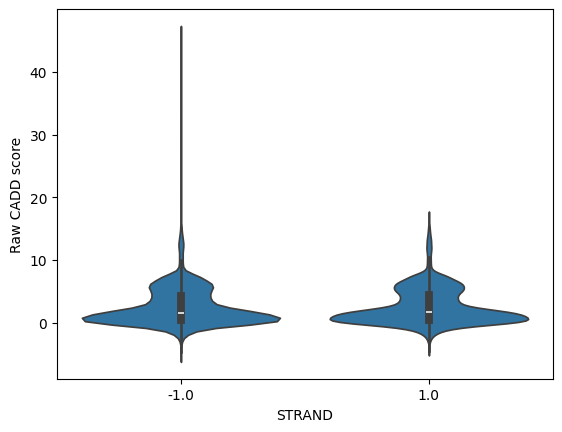

In [9]:
sns.violinplot(df, x="STRAND", y="Raw CADD score")

### ~~Chi-square!~~

In [12]:
df["IMPACT"].describe()

count        65188
unique           4
top       MODERATE
freq         33212
Name: IMPACT, dtype: object

In [14]:
contingency = pd.crosstab(df["SIFT score"], df["IMPACT"])
contingency

IMPACT,HIGH,MODERATE
SIFT score,,
deleterious,28,11471
deleterious_low_confidence,42,733
tolerated,1,11483
tolerated_low_confidence,9,1068


### Z-test!

In [9]:
merge = pd.concat([df["SIFT score"].replace({"_low_confidence":""}, regex=True), df["IMPACT"]], axis=1)
contingency = pd.crosstab(merge["SIFT score"], merge["IMPACT"])
contingency

IMPACT,HIGH,MODERATE
SIFT score,,
deleterious,70,12204
tolerated,10,12551


In [23]:
n1 = contingency.HIGH.sum()
x1 = contingency.HIGH.deleterious
p1 = x1 / n1

n2 = contingency.MODERATE.sum()
x2 = contingency.MODERATE.deleterious
p2 = x2 / n2

p_pooled = (x1 + x2) / (n1 + n2)
z = (p1 - p2 - 0) / math.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))

p_value = 2 * stats.norm.cdf(-z)
p_value

8.914656789046931e-12

### Stacked bar chart!

<Axes: xlabel='IMPACT'>

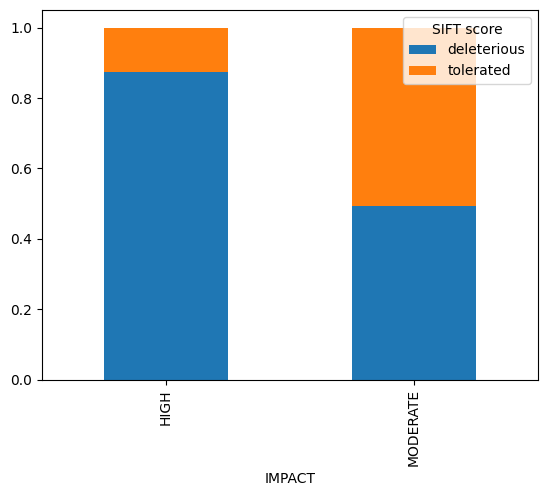

In [36]:
pd.crosstab(merge["SIFT score"], merge["IMPACT"], normalize="columns").T.plot(kind="bar", stacked=True)

### Consequences chi-square!

In [53]:
cons_merge = pd.concat([df["SIFT score"].replace({"_low_confidence":""}, regex=True), df["Consequence"]], axis=1)
cons_conti = pd.crosstab(cons_merge["SIFT score"], cons_merge["Consequence"])
cons_conti = cons_conti.drop(["start_lost&splice_region_variant"], axis=1)
stats.chi2_contingency(cons_conti, correction=False)

Chi2ContingencyResult(statistic=84.41714038470077, pvalue=4.667140514138873e-19, dof=2, expected_freq=array([[11855.40530745,   378.04856441,    38.54612814],
       [12134.59469255,   386.95143559,    39.45387186]]))

### Consequences Bar Chart! 

<Axes: xlabel='Consequence'>

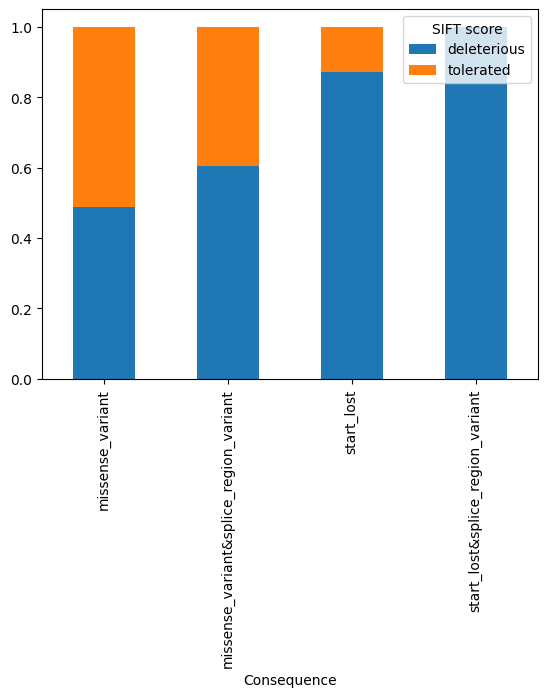

In [52]:
pd.crosstab(cons_merge["SIFT score"], cons_merge["Consequence"], normalize="columns").T.plot(kind="bar", stacked=True)

### Allele position vs CADD Score regression t-test!

In [51]:
cdna_fixed = []
for i in range(len(df["cDNA position"])):
    e = df["cDNA position"][i]
    if "-" in str(e):
        vals = str(e).split("-")
        if vals[0] == "?":
            cdna_fixed.append(vals[1])
        elif vals[1] == "?":
            cdna_fixed.append(vals[0])
        else:
            cdna_fixed.append((float(vals[0]) + float(vals[1])) / 2.0)
    else:
        cdna_fixed.append(e)
no_nan = pd.concat([pd.to_numeric(pd.Series(cdna_fixed, name="cDNA position")), pd.to_numeric(df["Raw CADD score"])], axis=1).dropna(axis=0, how="any")
stats.linregress(x=no_nan["cDNA position"], y=no_nan["Raw CADD score"], alternative="two-sided")

LinregressResult(slope=3.2935755550719284e-06, intercept=2.783026864305054, rvalue=0.014102473034924606, pvalue=0.0009101226162724868, stderr=9.929050140318108e-07, intercept_stderr=0.013930960840785314)

<Axes: xlabel='cDNA position', ylabel='Raw CADD score'>

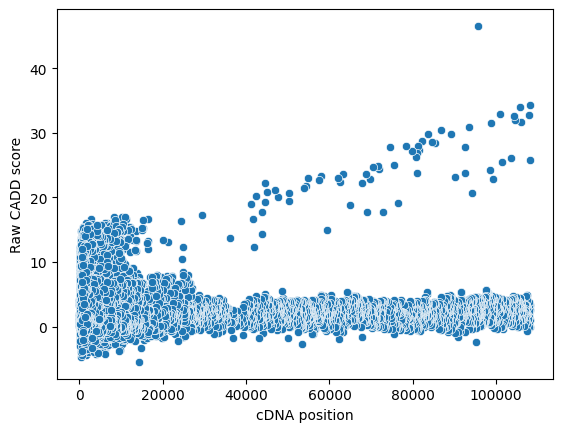

In [52]:
sns.scatterplot(no_nan, x="cDNA position", y="Raw CADD score")

In [55]:
cdna_fixed = []
for i in range(len(df["CDS position"])):
    e = df["CDS position"][i]
    if "-" in str(e):
        vals = str(e).split("-")
        if vals[0] == "?":
            cdna_fixed.append(vals[1])
        elif vals[1] == "?":
            cdna_fixed.append(vals[0])
        else:
            cdna_fixed.append((float(vals[0]) + float(vals[1])) / 2.0)
    else:
        cdna_fixed.append(e)
no_nan = pd.concat([pd.to_numeric(pd.Series(cdna_fixed, name="CDS position")), pd.to_numeric(df["Raw CADD score"])], axis=1).dropna(axis=0, how="any")
stats.linregress(x=no_nan["CDS position"], y=no_nan["Raw CADD score"], alternative="two-sided")

LinregressResult(slope=2.5265282870238246e-06, intercept=2.826979328213922, rvalue=0.010856164971100406, pvalue=0.011449002038845196, stderr=9.991121962346295e-07, intercept_stderr=0.014058517533499019)

<Axes: xlabel='CDS position', ylabel='Raw CADD score'>

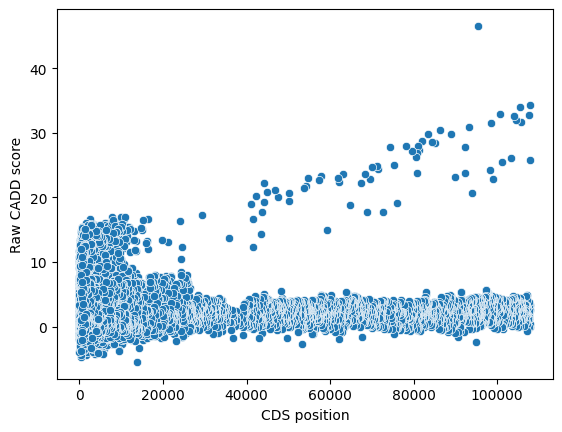

In [57]:
sns.scatterplot(no_nan, x="CDS position", y="Raw CADD score")